# Exercise 2:  First Steps in Python

1. Thinking about object types:
    * What types have we been using?
    * What are the most fundamental object types in python?
    * Objects that store multiple values
1. Functions, Methods, and Packages
1. Objects that Store Multiple Values
    * Python native objects
    * Numpy arrays
    * Basic indexing
1. Advanced Work with Arrays
    * Array manipulation
    * Multidimensional arrays
    * Array attributes
    
    
---

## 1. Object Types

At its most basic level, the information stored, displayed, and operated on by computers boils down to 0s and 1s. The text on the screen, the color of this box, the pictures we see, and the videos we watch on Netflix, all are "encoded" as a combination of 0s and 1s. When we create an object in Python, a critical piece of information about that object (that is mostly handled behind the scenes) is how we should encode it as 0s and 1s. 

Because Python is an extremely robust language (you can use it for math and data analysis as we are, but you can also use it to build applications, games, and all kinds of other sophisticated things) there is a diversity of objects that people create in Python -- Python needs to know how to think about these different kinds of data, and to do that, each object is assigned a different "type". Below, we are going to spend a little bit of time thinking about object types.

### 1.1 What types have we been using up to this point?

Take for example our simple object below, named `b`. We can ask python to tell us what type of an object we have here in `b`, using the `type()` command.

In [ ]:
b=5

In [ ]:
type(b)

You can see that the output of that `type()` command was `int`, which stands for integer. Integers are exactly what they sound like -- positive and negative whole numbers. Important to python, integers are really efficiently stored as 0s or 1s. Mostly for your curiousity, I provide a brief aside for how it is numbers are stored by computers.

<div class="alert alert-block alert-info">
<b>Thinking about "Binary Storage" of integers:</b> 
    
First, lets refresh our understanding of our own number system:

* The way we represent numbers conventionally is in base 10. Imagine we have 3 digits, "a", "b", "c", where each digit is a value that falls between 0-9. We combine those digits to form a three digit number "abc". To understand what that number means, we are actually doing a little bit of math: 

<div align=center> $a*10^2 + b*10^1 + c*10^0$. </div>

* Computers are really just a complex set of switches -- those switches don't have 10 different possible positions (like the values 0-9 that we use for digits in base 10), they only have two possible positions (you can think of them like a 0 or 1). So to store an integer using switches, we define a slightly different rule. Each switch, "a", "b", and "c", has a state that is either a 0 or 1. To get to a number, we do the following math: 

<div align=center> $a*2^2 + b*2^1 + c*2^0$ </div>

The simplest datatype we can have on a computer is what we call an "8 bit unsigned integer", or `uint8`. There are three parts to that name:
    * Unsigned means we assume it is positive
    * Integer means it is a whole number 
    * 8 bit meaning that it is stored in 8 bits (aka, 8 switches, which we commonly refer to as a "byte", like the megabytes and gigabytes we think about when storing data). 
    
We can use that framework to determine the maximum value that can be stored in a `uint8` object:

<div align=center> $1*2^7 + 1*2^6 + 1*2^5 + 1*2^4 + 1*2^3 + 1*2^2 + 1*2^1 + 1*2^0$ </div>
<div align=center> $128 + 64 + 32 + 16 + 8 + 4 + 2 + 1$ </div>
<div align=center> $256$ </div>
    
So ultimately, in this data type, we can only store numbers between 0 [00000000] and 256 [11111111]. We can store bigger numbers than 256 if we increase the number of bits we are using (i.e. `uint16` or `uint32`), but ultimately there are some values we care about that simply can't be stored as integers. We discuss those below.</div>

So, what happens if we are not using whole numbers? How does Python deal with those?

In [ ]:
b=5.1005

In [ ]:
type(b)

You can see that this object comes back with type "Float", otherwise known as a floating point number. Almost all of the analysis you will be doing will be using floating point numbers. It is important to note that, because computers cannot store an infinite number of significant figures, computations done using floating point numbers are ultimately approximations. On most computers a python floating point number is accurate to about 1 in 10^15, but this depends on both the architecture and on the operations you perform. That's enough accuracy for many purposes, but there are plenty of situations (for example counting things) when we really want to do things precisely, and we want 1 + 1 to be exactly 2. That's what integers are there for.

<div class="alert alert-block alert-info">
<b>Thinking about "Binary Storage" of floating point numbers:</b> 
    
Floating point numbers can store any real number (of finite size), and they do it using our binary switches in a clever way. Take for example the number above, 5.1005. Just as the computer encoded the integer using binary, floating point numbers use a fixed number of switches to encoding three things:
* The first set of switches encode the numbers we need to reproduce our value: 51005
* The second set of switches encode a different number, describing where the decimal place goes relative to the far right of our list of digits: 4 
* The final switch encodes the sign, where 0 and 1 correspond to positive and negative numbers: 0

The computer then recombines that information for us, and says "Take the number 51005 and put the decimal point four in from the right", yeilding 5.1005. An important consequence of this form of data storage is that it is just as easy for the computer to store 5100500000, 51.005, and 0.0000051005, it simply stores the string of numbers it needs (51005) and the position of the decimal point.

This philosophy underpins all different ways of storing numbers: you use some switches for the values, some switches for the decimal point, and a switch for the sign (+/-).

</div>

Thinking about types is an important thing to do in general programming, because variable types are not generally reassigned dynamically. So, for example, the operation 5/2 in many languages would yield 2 rather than 2.5 if 5 is an integer (because the output would be forced to be the same types as the input). In our case, however, we are using Python 3, which will automatically convert an integer to a different object type if the natural output is not a whole number, as below:

In [ ]:
b = 5
type(b)

In [ ]:
c = b/2
c

In [ ]:
type(c)

unlike b, b/2 is ***not*** an integer.

### 1.2 What are some other important types in Python?

A third type of very useful variable is strings, abbreviated str. A string is a sequence of characters, and one can declare that something is a string by putting characters in quotation marks (either " or ' is fine):

In [ ]:
d = "Glacier"

In [ ]:
type(d)

The quotation marks are important in defining a string here. To see why, try issuing the command without them:

In [ ]:
d = Glacier

This is an error message, complaining that the computer doesn't know what Glacier is. The problem is that, without the quotation marks, python thinks that star is the name of a variable, and complains when it can't find a variable by that name. Putting the quotation marks tells python that we mean a string, not a variable named star.

Obviously we can't add strings in the same sense that we add numbers, but we can still do operations on them. The plus operation concatenates two strings together:

In [ ]:
e = "Ice"

In [ ]:
d+e

In addition to integers, floats, and strings, there is one other type of object worth mentioning at this moment. That is a Boolean variable (named after George Boole), which represents a logical value. Boolean variables can be either True or False, and are stored using a single bit:

In [ ]:
g = True

In [ ]:
type(g)

Boolean variables can have logic operations performed on them. In particular, there are three logical operators that we care about: not, and, and or. Play around with the cells below (defining new variables to test your theories on if you wish) and see if you can figure out what each one does, and then describe it below.

In [ ]:
not g

In [ ]:
h = False

In [ ]:
g and h

In [ ]:
g or h

---

## 2. Functions, Methods, and Packages

Our end goal in using python is to analyze, visualize, and interpret quantitative data. To do that, we perform complex operations on the data, some of which come defined in Python for everyone to use, some of which are written by others but distributed for broad use, and some of which we define ourselves. I found the nomenclature that describes these operations, and the syntax required to use them in Python, confusing when I Was first learning, so I want to take some time and be clear here. The video below provides a brief overview of functions, methods, and packages, which we will go through in more detail below.

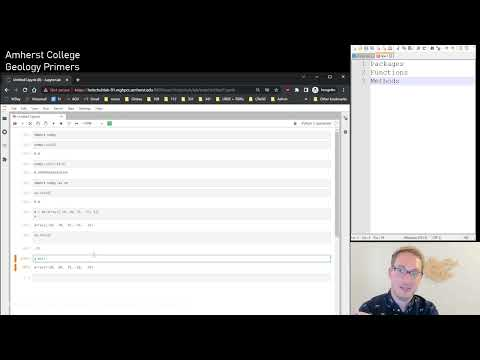

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('7QHl4OMjLUU', width=1000, height=600)

* **Function**: This is a statement in python that performs a specific task. Typically functions take inputs, which we call **arguments**, that are objects that supply critical information to the function. Executing, or "calling" a function, is typically done using the function name, followed by parenthesis containing a sequence of arguments, e.g.: `function(arg1,arg2)`
* **Method**: This is a specific type of function, and to understand it, we have to broaden our definition of "object". As we said before, objects contain data. But in addition to data, objects can also contain a defined set of functions that people would want to commonly apply to the data stored in that object. We call those functions that come bundled in an object "methods" -- these typically use the data stored in the object as the input argument (although this does not preclude the use of additional arguments with a method). Methods are executed/called in a different way -- imagine we had a list stored in the variable `obj`, then calling a method would look as follows: `obj.method(arg1,arg2)`.
* **Packages**: We often want to use functions and create new kinds of objects than python needs by default. There are communities dedicated to developing code for common functions, and we can simply download and install these publically available sets of code called "packages" using tools called "package managers". At the start of each notebook, it is conventional to tell Python which of the installed packages you want to use. To do this, you use a special function in python called `import`, which brings that code into your working environment. To use functions from a package, you first import them by stating `import packagename`, and then you typically use the following syntax to run functions from that package: `packagename.function(arg1,arg2)`

There are many aspects of the below that will still be unculear, but I provide this code as an example of importing a very common package for mathematical manipulation of data (`numpy`), using a numpy function to find the minimum of set of anumbers, and calling a method attached to the set of numbers that does .

In [ ]:
import numpy
########## This creates a special numpy object that we will discuss below))
a = numpy.array([1,2,3,4])
a

In [ ]:
numpy.min(a)

In [ ]:
a.min()

There are a few cases where we want to import packages in a slightly different way. For packages that we will be using often, we don't want to type the package name out in its entirety every time we use a function, so we can give the package a shorthand name when we import it. For example, many folks use `np` in place of `numpy`, and we can import it in a way that allows us to maintain that shorthand throughout the notebook:

In [ ]:
import numpy as np
np.array([1,2,3,4])

It is also possible to import just a single function from a package -- when you do that, you can call that function just using `function(arg1,arg2)` instead of `package.function(arg1,arg2)`. So, for example, if we just wanted that `min()` function from numpy, we could do the following:

In [ ]:
from numpy import min
min(a)

This section is primarily designed to give you some facilitiy with the language of Python -- the practical skills demonstrated here will be reinforced more as we continue to work with the language. But, if there are parts of this that are unclear, now is a good time to chat with your neighbors about the cells above. See if you can make sense of them together, or if not, feel free to come ask questions!

---

## 3 Objects that store multiple values

Ultimately, we aren't going to be working with individual numbers -- much of what we are going to do resembles the cells in the previous section: working with large collections of numbers. So it is useful to think about the native Python objects that can store more than one value. The video below provides a brief review of objects and variable names (as you saw in the previous exercise), and then introduces the python-native objects that are capable of storing multiple values. (If you feel like you don't need the review, feel free to skip to 4:00).

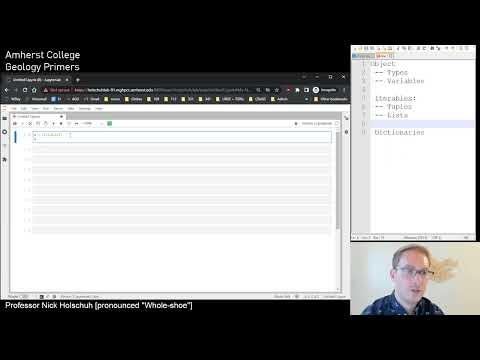

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('4vWB82BMRRc', width=1000, height=600)

### 3.1 Python Native Objects

There are ultimately three object types that are built into basic python:
* **The Tuple**: Created by including multiple numbers within `()`, separated by commas.
* **The List**: Created by including multiple numbers within `[]`, separated by commas.
* **The Dictionary**: Created by including what are called "key:value pairs" within `{}`, separated by commas (this will be explained in more detail in a moment).

An important characteristic of Tuples and Lists is that they are "ordered" -- that is, the values have a defined sequence, and if you want to think about just a subset of the information stored in a Tuple or List, you can find the part you want based on where your targeted data sit in the defined order. This process of selecting just a subset of an object is called **"indexing"**, and we will talk about it in great detail by the end of this exercise. 

So what makes lists and tuples different? If, let's say, you have a `list` containing 10 values, and you decide you want to change the 4th value, python allows you to modify parts of the list after it is created. But if you have a `tuple` containing those same 10 values, and you want to update it with a new 4th entry, tuples will _**not**_ let you do that. Because tuples can never be changed once they are created, we call them "immutable". (I almost never use Tuples, but there are some situations where it is nice to guarantee your object will never change).

Unlike Tuples and Lists, Dictionaries are not ordered in any particular sequence. Instead, each value stored in a dictionary is assigned a "key" -- a name, defined by a string, that can be used to find subsets of the dictionary that you care about. We will practice finding the values we are interested in in Tuples, Lists, and Dictionaries in a moment -- for now, I want to simply present an example of a tuple, a list, and a dictionary below. Remember the brackets used to identify the different sets: `()`, `[]`,`{}`.

In [ ]:
a = (1,1,2,3,5,7,12)
a

In [ ]:
type(a)

In [ ]:
b = [1,1,2,3,5,7,12]
b

In [ ]:
type(b)

In [ ]:
c = {'cat':1,'dog':1,'bird':2,'lizard':3,'giraffe':5}
c

In [ ]:
type(c)

Lists and tuples are incredibly flexible objects -- they can store in their compartments objects with a variety of types. Take a look at the example below, where I have a list with an integer, a floating point number, and a string, all in one object!

In [ ]:
flex_list = [1, 33.4, 'Hello']
flex_list

### 3.2 The Numpy Array

This flexibility of a list is a double edged sword -- by having the ability to store anything, it can be a quick and dirty tool for collecting objects of any flavor. But because you can't guarantee all of the objects contained by the list are the same type, there are a limited number of built in operations that allow you to (for example) perform a computation on every object in the list at the same time. This is a severe limitation. So, when dealing with numbers, we typically use a special object designed within the `numpy` package we mentioned above: the "numpy array". Like lists and tuples, numpy arrays are ordered, but they can only contain numbers that all have the same type. To make a numpy array, we need to do three things:
* Import numpy (this only needs to be done once in each notebook)
* Assemble our collection of numbers in one of the native python objects
* Use the `numpy.array` function, with our collection of numbers as the input argument. 

In [ ]:
import numpy
values = [1,1,2,3,5,8,13];
value_array = numpy.array(values)

value_array

Now, we can use the numpy array to perform rapid operations on all of the values it contains. For example, imagine we wanted to add 3.5 to every number, we simply do the following:

In [ ]:
value_array+3.5

### 3.1 Basic Indexing

As mentioned above, "indexing" is how we refer to individual items (or subsets) of an object in Python. Indexing can get _incredibly_ complicated -- we will build some sophisticiation in the way we index data in the future. But for now, we want to cover the basics: how do we pull out subsets of our objects? To do this, we are going to focus on just two object types -- numpy arrays and dictionaries. These highlight the two primary ways we will index objects: using their integer positions in iterables (in objects like numpy arrays), and using keys within the object (in objects like dictionaries).

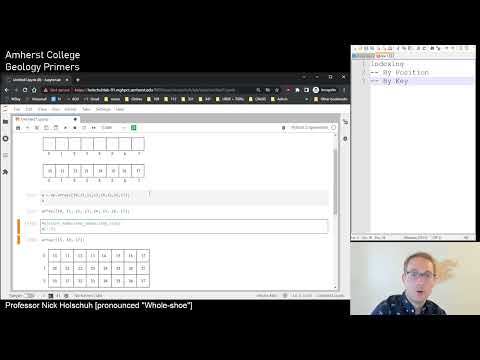

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('FNlCC2aTiaY', width=1000, height=600)

So, let's start with our basic iterable (in this case, a numpy array). Think of an array as a box with a bunch of numbered compartments, each of which can hold something. For example, here is a box with eight compartments.

![](https://drive.google.com/uc?export=view&id=1liecCBkXR30DXDrw6lnOkcLpoQQNJ9sE) 

Imagine we will those boxes with specific numbers. We can visualize the object in terms of the values stored (the numbers in the box), and the "index" associated with each value (the numbers below the boxes).

![](https://drive.google.com/uc?export=view&id=1Pcu4VtKtojLGa3Mkx9fHkXpkNPHeWiTe) 

We can use the "index" (the integer associated with each compartment) to pull out specific values that we are interested in. It is important to note that when python is counting boxes, it starts counting with the first box labeled "0". This is something that is set by convention for different programming languages; some start at 0, some start at 1. There are advantages to each, but people will fight to the death over which is better (and most Computer Science people argue it is 0...). 

Let's create the specific array I've drawn here, and store it in the variable `x`:

In [ ]:
x = np.array([10,11,12,13,14,15,16,17])

Note that there is no output here, because again we are defining a variable. You can see it and check the stored values by typing the variable name.

In [ ]:
x

Now, if we wanted to pull out just the number 13, we can ask Python to provide just a subset of our object by calling the object and using `[]` to indicate which indecies we want. For 13, we want index 3:

In [ ]:
x[3]

In [ ]:
type(x[3])

In [ ]:
x[3]*2

In [ ]:
x[2] = 32
x

In the examples above, we printed out the value stored in compartment number 3 of the array x, we checked the type of value stored in that compartment (in this case, a 64 bit integer), we multiplied it by 2 to get a result, and then we assigned a different value (32) to that compartment, erasing its original value.

So why are arrays more useful than just individual variables? There are a number of reasons, but one of the most important is called broadcasting, meaning that we can access, perform arithmetic with, and alter multiple elements of an array at once. We specify parts of an array by giving a range of indices in the square brackets.  To specify which indecies we want, we can use the following general framework:
`object[start_index:end_index:index_spacing]`

You do not have to specify every value in that framework. Leaving the first value blank means you want to start from the beginning of the array, leaving the second value blank means you want to go to the end of the array, and leaving the third value blank means you want to use every value between start and end. Python always interprets the indexing statement from left to right; if you include only a single colon, it assumes you are entering just information aboutu the start and end indecies. Here are a couple of examples of possible indexing statements - think about what each might mean?
* `obj[0:4]`
* `obj[4:]`
* `obj[:10]`
* `obj[:]`
* `obj[::4]`


In [ ]:
x[1:4]

Note, the end index provided are **exclusive, not inclusive, so the ending index element is not included**. Try some of the index options below

In [ ]:
x[:4]

In [ ]:
x[4:]

In [ ]:
x[::2]


Finally, array indices can be specified either as positive numbers, which count from the beginning, or as negative numbers, which count from the end. The last element is -1, the second to last is -2, and so forth, as shown below:

![](https://drive.google.com/uc?export=view&id=1aHrZpmzcacTnlE76kCQWT75KIXGMRV7g) 

This is convenient, for example, if one wants to refer to all but the last 2 elements of an array:

In [ ]:
x[:-2]

The really useful thing is that one can use this capability to perform mathematical operations or assignments to multiple elements of an array at once. Several examples are given below. Execute the cell, examine the output, and make sure you understand what happened to the array before moving on. 

In [ ]:
x-10

In [ ]:
x[1:4]-10

In [ ]:
x[1:4]=-10
x

In [ ]:
x[::2]=5
x

The other type of indexing you will encounter is indexing based on keys. As we mentioned before, dictionaries store information in "key:value" pairs, and so is possible to retrieve just the values associated with a single key using a similar syntax for what we use with arrays.

In [ ]:
example_dict = {'Nick':[1,2,3,4,5],'Sophia':[6,7,8,9,10],'Ruth':[11,12,13,14,15],'Fiona':[16,17,18,19,20]}
example_dict

If we just wanted Ruth's values, we can supply the key 'Ruth' in hard brackets to retrieve just her list:

In [ ]:
example_dict['Ruth']

<div class="alert alert-block alert-info">
<b>Note:</b> One of the most common errors you will encounter in Python is using the wrong type of parenthesis for your intended function. Keep the following in mind:
    
* There are essentially two scenarios when you will use `( )` -- when calling a function or method, and when defining a tuple. It is useful to keep that in mind, every function uses `( )` to define its input arguments.
* There are essentially two scenarios when you will use `[ ]` -- when indexing into an object, or when creating a list.
</div>

---

## 4 Advanced Work with Arrays

### 4.1 Multidimensional arrays

The arrays we've played with so far are one-dimensional, meaning that they look like a series of boxes laid out in a line. However, arrays can be multidimensional as well, where we instead lay the data out in a grid. This results in what we call a two-dimensional array, an example of which we show here: 

![](https://drive.google.com/uc?export=view&id=1yijbZjKoJRtYVYA099KlAc_wwiKq8Kj5) 


In [ ]:
x2d = np.array([[10,11,12,13,14,15,16,17], [20,21,22,23,24,25,26,27], [30, 31, 32, 33, 34, 35, 36, 37]])
x2d

Similarly, one can index multi-dimensional arrays just by indexing each dimension in turn, starting with the indecies that represent the rows (those numbers to the left of the above array) and the indecies that represent the columns (the numbers below the array).  Indexing uses the same syntax as before, but the `start_index:end_index:index_spacing` for each dimension is separated by a comma within the `[]`. Execute each of the cells below and make sure you understand what it is doing.

In [ ]:
x2d[0,0]

In [ ]:
x2d[0,:]

In [ ]:
x2d[:,1]

In [ ]:
x2d[:,1:4]

Arrays can of course have more than two dimensions as well. In fact, there is no limit to how many dimensions they can have.

You can also do useful things like find the maximum and minimum values in arrays, and their means and totals:

In [ ]:
np.amin(x2d)

In [ ]:
np.amax(x2d)

In [ ]:
np.mean(x2d)

In [ ]:
np.sum(x2d)

### 4.4 Array Attributes

Some of the work we do is image manipulation, and images are essentially very large arrays (large enough that it no longer becomes practical to print them to the window as we've been doing here). Upon importing an array or after manipulating it, you will often want to know some of its basic properties. There are several built-in python functions that are particularly useful for this, and you call them by typing the variable name + the operator name, as below. 

In [ ]:
x2d.ndim

In [ ]:
x2d.shape

In [ ]:
x2d.size

In [ ]:
x2d.dtype

<div class=hw>

### Exercise 4 

-------------

Follow the steps below. 

1) Create a 10 x 10 numpy array and set it equal to a variable. An easy way to initialize an array of a given size is to use the numpy `zeros` function, which takes a single argument that is a list containing the number of values in each dimension. Print it to output once you're done populating it as described below. 
  * make the first row contain the numbers 1 through 10 in order  
  * make each element in the second row equal to 1 more than the first row  
  * row 3 = row 1\*10  
  * row 4 = (row 1)$^2$  
  * row 5 = $\sqrt{row 2}$  
  * row 6 = 3\*row 3-2\*row 4
  * row 7 = alternating 0s and 1s, starting with 1
  * row 8 = all 8s except the third from last element, which is -8
  * row 9 = 1, 1/2, 1/3, 1/4, ...
  * row 10 = all elements are 42

2) copy this array into a new variable, then in the new array, multiply each number in the third column by two  
3) set the second to last element in each row of the new array equal to 0, and print the new array as output  
4) multiply your original array by this new array and print the output  
    
<div class="alert alert-block alert-info">
One of the most common errors you will encounter in Python is using the wrong type of parenthesis for your intended function. Keep the following in mind:Say you know you want to use the numpy function zeros to define an array, but you can't remember the syntax for the option, its name, etc. You can do one of the following:
    
* Enter the function name with a question mark in code cell and execute, e.g.: `np.zeros?`
* When in command mode in the Jupyter Notebook, type `command+i` -- this will launch the contextual help window. Clicking on any python function will describe what it is in the contextual help window.
</div>


    

In [ ]:
#execute this cell before beginning so that the array will be more readable when you print it
np.set_printoptions(precision=3, suppress=True, linewidth=120)

In addition to the capabilities we've just gone through, arrays can do far more. For a full list, see http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html.